In [9]:
import ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import ListedColormap
import math

df = pd.read_csv("Cleaned_DF.csv")

In [10]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [11]:
mask1 = (df['CryoSleep'] == 0)&(df['route']>3.5)&(df['Age']>12.5)
features = ['Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']
dz = df[mask1][features+["Transported"]]
dz.shape

(1921, 12)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X = dz.drop("Transported",axis = 1)
y = dz["Transported"]
X = dz[features]
X_std = sc.fit_transform(X)
X_std

array([[ 0.3697, -0.2963, -0.5413, ..., -0.8341, -1.0089,  1.1392],
       [ 1.9131,  3.3754, -0.5008, ..., -0.8341,  0.9912,  1.1392],
       [-0.1176, -0.2963, -0.5413, ..., -0.8341,  0.9912,  1.1392],
       ...,
       [ 0.5322,  3.3754, -0.5413, ..., -0.6017, -1.0089,  0.4342],
       [-0.1989, -0.2963, -0.5413, ...,  0.6079,  0.9912,  0.4342],
       [ 0.7759, -0.2963, -0.4225, ...,  0.6079,  0.9912,  1.1392]])

In [13]:
np.set_printoptions(precision = 4)
mean_vecs = []
labels = [-1.0,1.0]
for label in range(1,len(labels)+1):
    mean_vecs.append(np.mean(X_std[y == labels[label-1]],axis = 0))
    print('MV %s: %s\n'%(label,mean_vecs[label-1]))

MV 1: [-0.0112  0.0021  0.1419 -0.2287 -0.1118  0.1372  0.123   0.1017  0.0451
 -0.0773 -0.1223]

MV 2: [ 0.0251 -0.0048 -0.3185  0.5133  0.251  -0.308  -0.2762 -0.2283 -0.1013
  0.1736  0.2746]



In [14]:
d = len(features)
S_W = np.zeros((d,d))
for label , mv in zip(labels , mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_std[y == label]:
        row, mv = row.reshape(d,1), mv.reshape(d,1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print ('Матрица раассеяния внутри классов: %sx%s'%(S_W.shape[0], S_W.shape[1]))
S_W

Матрица раассеяния внутри классов: 11x11


array([[ 1920.4625,   180.9975,  -122.2461,   163.258 ,  -170.822 ,
          203.7974,   108.1619,  -320.1577,  -147.7775,     8.0866,
          341.3528],
       [  180.9975,  1920.9806,   -73.4563,   123.1161,   -79.925 ,
           -8.0752,   135.005 ,  -240.0303,  -120.6516,   -30.033 ,
          136.9031],
       [ -122.2461,   -73.4563,  1834.1933,  -217.2815,    26.9175,
         -290.2509,  -364.45  ,   431.3881,   257.93  ,    14.0465,
         -554.8927],
       [  163.258 ,   123.1161,  -217.2815,  1695.5302,  -338.2673,
          361.4274,   355.0986,  -614.7199,  -402.0978,     9.78  ,
          647.8559],
       [ -170.822 ,   -79.925 ,    26.9175,  -338.2673,  1867.0895,
          -52.8527,  -100.413 ,   242.8342,   235.9123,   -89.5709,
         -287.1956],
       [  203.7974,    -8.0752,  -290.2509,   361.4274,   -52.8527,
         1839.8005,    48.8693,  -510.8909,  -323.0896,    72.4898,
          631.4477],
       [  108.1619,   135.005 ,  -364.45  ,   355.0986,  -

In [15]:
S_W = np.zeros((d,d))
for label,mv in zip(labels, mean_vecs):
    class_scatter = np.cov(X_std[y==label].T)
    S_W += class_scatter
print('Масштабированная матрица рассеяния внутри классов: %sx%s' % (S_W.shape[0], S_W.shape[1]) )
S_W


Масштабированная матрица рассеяния внутри классов: 11x11


array([[ 1.9658,  0.1667, -0.1054,  0.1786, -0.2572,  0.1618,  0.0876,
        -0.3275, -0.1735,  0.0201,  0.3434],
       [ 0.1667,  1.9943, -0.0796,  0.1811, -0.1227,  0.0123,  0.1107,
        -0.2658, -0.1392, -0.0074,  0.1751],
       [-0.1054, -0.0796,  1.5346, -0.2261,  0.0271, -0.2235, -0.2845,
         0.3919,  0.2237, -0.0054, -0.4983],
       [ 0.1786,  0.1811, -0.2261,  2.3721, -0.5118,  0.3035,  0.3293,
        -0.748 , -0.5131,  0.0229,  0.7787],
       [-0.2572, -0.1227,  0.0271, -0.5118,  2.6648, -0.054 , -0.1046,
         0.2989,  0.3194, -0.1398, -0.3679],
       [ 0.1618,  0.0123, -0.2235,  0.3035, -0.054 ,  1.4278,  0.0387,
        -0.4186, -0.2695,  0.0697,  0.5125],
       [ 0.0876,  0.1107, -0.2845,  0.3293, -0.1046,  0.0387,  1.4517,
        -0.5131, -0.3108,  0.0405,  0.5641],
       [-0.3275, -0.2658,  0.3919, -0.748 ,  0.2989, -0.4186, -0.5131,
         1.9101,  1.2051, -0.1141, -1.4005],
       [-0.1735, -0.1392,  0.2237, -0.5131,  0.3194, -0.2695, -0.3108,
 

In [16]:
mean_overall = np.mean(X_std, axis= 0)
S_B = np.zeros((d,d))
for i , mean_vec in enumerate(mean_vecs):
    n = X_std[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
    S_B +=n*(mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Матрица рассеяния между классами: %sx%s'%(S_B.shape[0],S_B.shape[1]))
S_B

Матрица рассеяния между классами: 11x11


array([[ 7.3790e-02, -1.4002e-02, -9.3771e-01,  1.5113e+00,  7.3897e-01,
        -9.0692e-01, -8.1320e-01, -6.7208e-01, -2.9838e-01,  5.1107e-01,
         8.0845e-01],
       [-1.4002e-02,  2.6568e-03,  1.7793e-01, -2.8676e-01, -1.4022e-01,
         1.7209e-01,  1.5430e-01,  1.2753e-01,  5.6617e-02, -9.6975e-02,
        -1.5340e-01],
       [-9.3771e-01,  1.7793e-01,  1.1916e+01, -1.9205e+01, -9.3908e+00,
         1.1525e+01,  1.0334e+01,  8.5407e+00,  3.7918e+00, -6.4946e+00,
        -1.0274e+01],
       [ 1.5113e+00, -2.8676e-01, -1.9205e+01,  3.0951e+01,  1.5135e+01,
        -1.8574e+01, -1.6655e+01, -1.3765e+01, -6.1110e+00,  1.0467e+01,
         1.6557e+01],
       [ 7.3897e-01, -1.4022e-01, -9.3908e+00,  1.5135e+01,  7.4006e+00,
        -9.0825e+00, -8.1439e+00, -6.7306e+00, -2.9881e+00,  5.1182e+00,
         8.0963e+00],
       [-9.0692e-01,  1.7209e-01,  1.1525e+01, -1.8574e+01, -9.0825e+00,
         1.1147e+01,  9.9947e+00,  8.2603e+00,  3.6673e+00, -6.2814e+00,
        -9.936

In [17]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs=sorted(eigen_pairs, key = lambda k: k[0], reverse = True)

print('Собственные значения в ппорядке убывания:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Собственные значения в ппорядке убывания:

62.5779849206257
2.8629954741121128e-15
2.845478243520737e-15
2.84521427322575e-15
2.84521427322575e-15
2.1281974959095596e-15
1.52079280819982e-15
1.52079280819982e-15
5.868563642090776e-16
5.868563642090776e-16
1.0647039254609064e-16


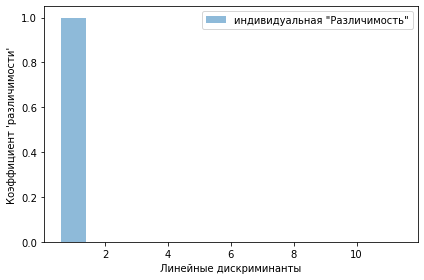

In [18]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted (eigen_vals.real, reverse = True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,12),discr, alpha = 0.5, align = 'center',label = 'индивидуальная "Различимость"')
plt.ylabel("Коэффициент 'различимости'")
plt.xlabel('Линейные дискриминанты')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [19]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real, eigen_pairs[1][1][:,np.newaxis].real))
print('Матрица W:\n',w)

Матрица W:
 [[ 0.0099  0.008 ]
 [-0.0364  0.2109]
 [-0.3318 -0.2382]
 [ 0.378  -0.4193]
 [ 0.2318  0.1985]
 [-0.5509  0.3726]
 [-0.5294 -0.3699]
 [-0.0905  0.1217]
 [ 0.0565  0.0784]
 [ 0.149  -0.1542]
 [ 0.2727  0.6025]]


In [20]:
X_lda = X_std.dot(w)

<function matplotlib.pyplot.show(close=None, block=None)>

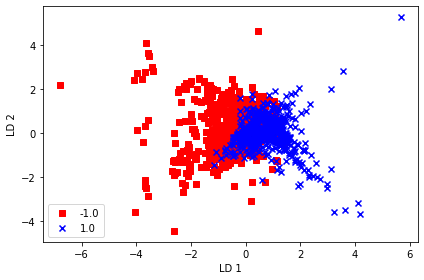

In [21]:
colors = ['r','b']
markers = ['s','x']
for l,c,m in zip(np.unique(y),colors, markers):
    plt.scatter(X_lda[y == l, 0],X_lda[y == l, 1],c = c, label = l, marker = m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show

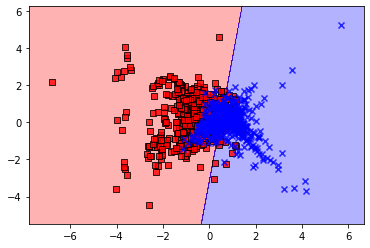

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'lbfgs')
ppn_test = lr.fit(X_lda,y)
ds.plot_decision_regions(X_lda,y,classifier = ppn_test,resolution = 0.01)

In [23]:
lr.score(X_lda,y)

0.8334200937011973

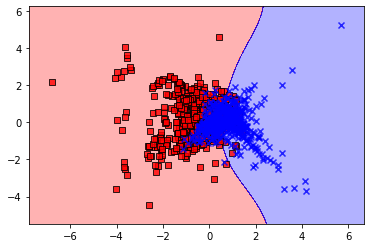

In [24]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.1, C =1)
ppn_test = svm.fit(X_lda,y)
ds.plot_decision_regions(X_lda,y,classifier = ppn_test,resolution = 0.01)

In [25]:
svm.score(X_lda,y)

0.8407079646017699

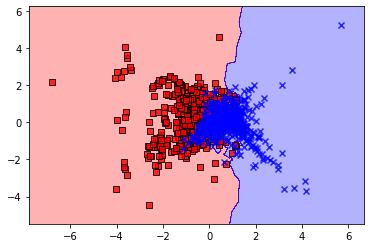

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, p=2, metric = "minkowski")
ppn_test = knn.fit(X_lda,y)
ds.plot_decision_regions(X_lda,y,classifier = ppn_test,resolution = 0.01)

In [27]:
knn.score(X_lda,y)

0.8859968766267569

In [28]:
error_percentage = 100*(0.115*1921 + 1519*0.04 + 103*0.01)/3542
print('Ошибок%: ',error_percentage)

Ошибок%:  7.981507622811971
